In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [85]:
kf_mae = pd.read_csv("results/gru_kf_mae.csv")
los_mae = pd.read_csv("results/los_transformer_mae.csv")
mortality_auroc = pd.read_csv("results/gru_mortality_auroc_auprc.csv")

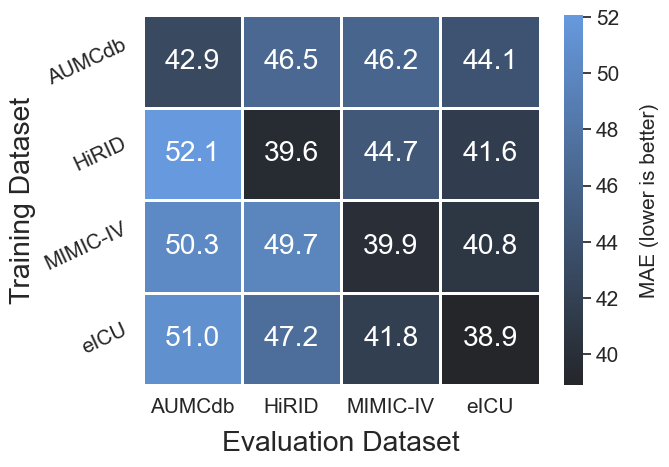

In [109]:
kf_pivoted = kf_mae.pivot(index = "source_db", columns=["eval_db"], values=["result"])
los_pivoted = los_mae.pivot(index = "source_db", columns=["eval_db"], values=["result"])
table = los_pivoted
sns.set(font_scale=1.7)

hm = sns.heatmap(table, annot=True, fmt=".1f", cmap=sns.dark_palette("#69d", reverse=False, as_cmap=True,), yticklabels=["AUMCdb", "HiRID", "MIMIC-IV","eICU"], xticklabels=["AUMCdb", "HiRID", "MIMIC-IV","eICU"], linewidth=2)
hm.tick_params(axis='x', rotation=0, labelsize=15)
hm.tick_params(axis='y', rotation=25, labelsize=15)
cbar = hm.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)
label = cbar.set_label('MAE (lower is better)', labelpad=15, fontsize=15)
hm.set(xlabel="Evaluation Dataset", ylabel="Training Dataset")
hm.set_xlabel(xlabel="Evaluation Dataset", labelpad=10)
plt.savefig("results/ext_val_los_transformer_mae.pdf", bbox_inches='tight')


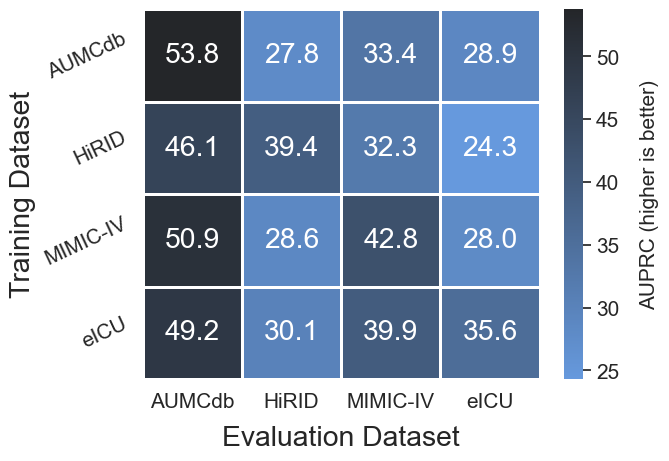

In [111]:
mortality_pivoted = mortality_auroc.pivot(index = "source_db", columns=["eval_db"], values=["AUPRC"])
table = mortality_pivoted
sns.set(font_scale=1.7)

hm = sns.heatmap(table, annot=True, fmt=".1f", cmap=sns.dark_palette("#69d", reverse=True, as_cmap=True,), xticklabels=["AUMCdb", "HiRID", "MIMIC-IV","eICU"], linewidth=2)
hm.tick_params(axis='x', rotation=0, labelsize=15)
hm.tick_params(axis='y', rotation=25, labelsize=15)
cbar = hm.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)
label = cbar.set_label('AUPRC (higher is better)', labelpad=15, fontsize=15)
hm.set(xlabel="Evaluation Dataset", ylabel="Training Dataset")
hm.set_xlabel(xlabel="Evaluation Dataset", labelpad=10)
plt.savefig("results/ext_val_mortality_gru_auprc.pdf", bbox_inches='tight')

In [32]:
kf_mae.pivot(index = "source_db", columns=["eval_db"], values=["result","std"])

result                           std                       
eval_db   AUMCdb  HiRID MIMIC-IV   eICU AUMCdb  HiRID MIMIC-IV   eICU
source_db                                                            
AUMCdb     0.224  0.340    0.361  0.446  0.004  0.003    0.001  0.001
HiRID      0.325  0.270    0.423  0.493  0.002  0.005    0.001  0.001
MIMIC-IV   0.306  0.375    0.241  0.333  0.002  0.003    0.003  0.001
eICU       0.299  0.378    0.263  0.288  0.002  0.003    0.001  0.002

In [21]:
kf_mae.columns

Index(['source_db', 'eval_db', 'result', 'std'], dtype='object')